# Creating Insightfull Visualizations from the cleaned data . 

1️⃣ 🥧 Subscription Plan Distribution
Goal

To understand how users are distributed across different subscription plans.

Visualization

Pie chart of plan_type.


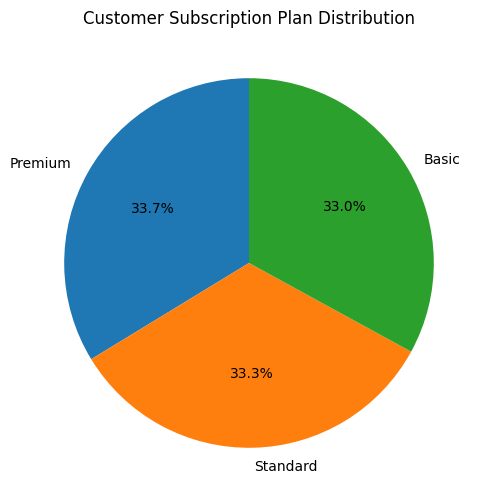

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
 # used elsewhere in EDA

# Load dataset
df = pd.read_csv(
    "/workspaces/Data-Science-Intern/WEEK 2/Project_1/dataset/Cleaned_customer_subscription_dataset.csv"
)

# Count subscription plans
plan_counts = df['plan_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    plan_counts.values,
    labels=plan_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Customer Subscription Plan Distribution')
plt.show()



Insight

Shows the proportion of users on Basic, Standard, and Premium plans, helping identify which subscription tiers are most popular and where conversion or pricing strategies can be optimized.

2️⃣ 📊 Revenue by Subscription Plan
Goal

To compare how much revenue each subscription plan generates.

Visualization

Bar chart of total monthly revenue grouped by plan_type.


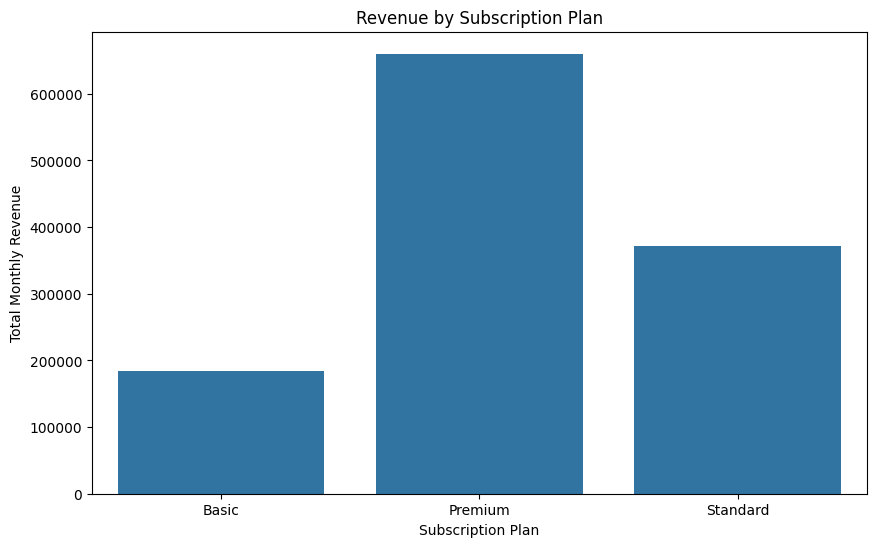

In [39]:
import seaborn as sns 
# Calculate total revenue per plan
revenue_by_plan = (
    df.groupby('plan_type')['monthly_fee']
      .sum()
      .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=revenue_by_plan,
    x='plan_type',
    y='monthly_fee'
)

plt.xlabel('Subscription Plan')
plt.ylabel('Total Monthly Revenue')
plt.title('Revenue by Subscription Plan')
plt.show()



Insight

Although the number of users across plans may be similar, Premium users contribute the highest revenue, making them the most valuable segment. This insight helps prioritize retention and upselling strategies.

3️⃣ 📈 Monthly User Signup Trend
Goal

To analyze how user signups change over time and identify growth patterns or seasonality.

Visualization

Line chart showing number of user signups per month based on signup_date.


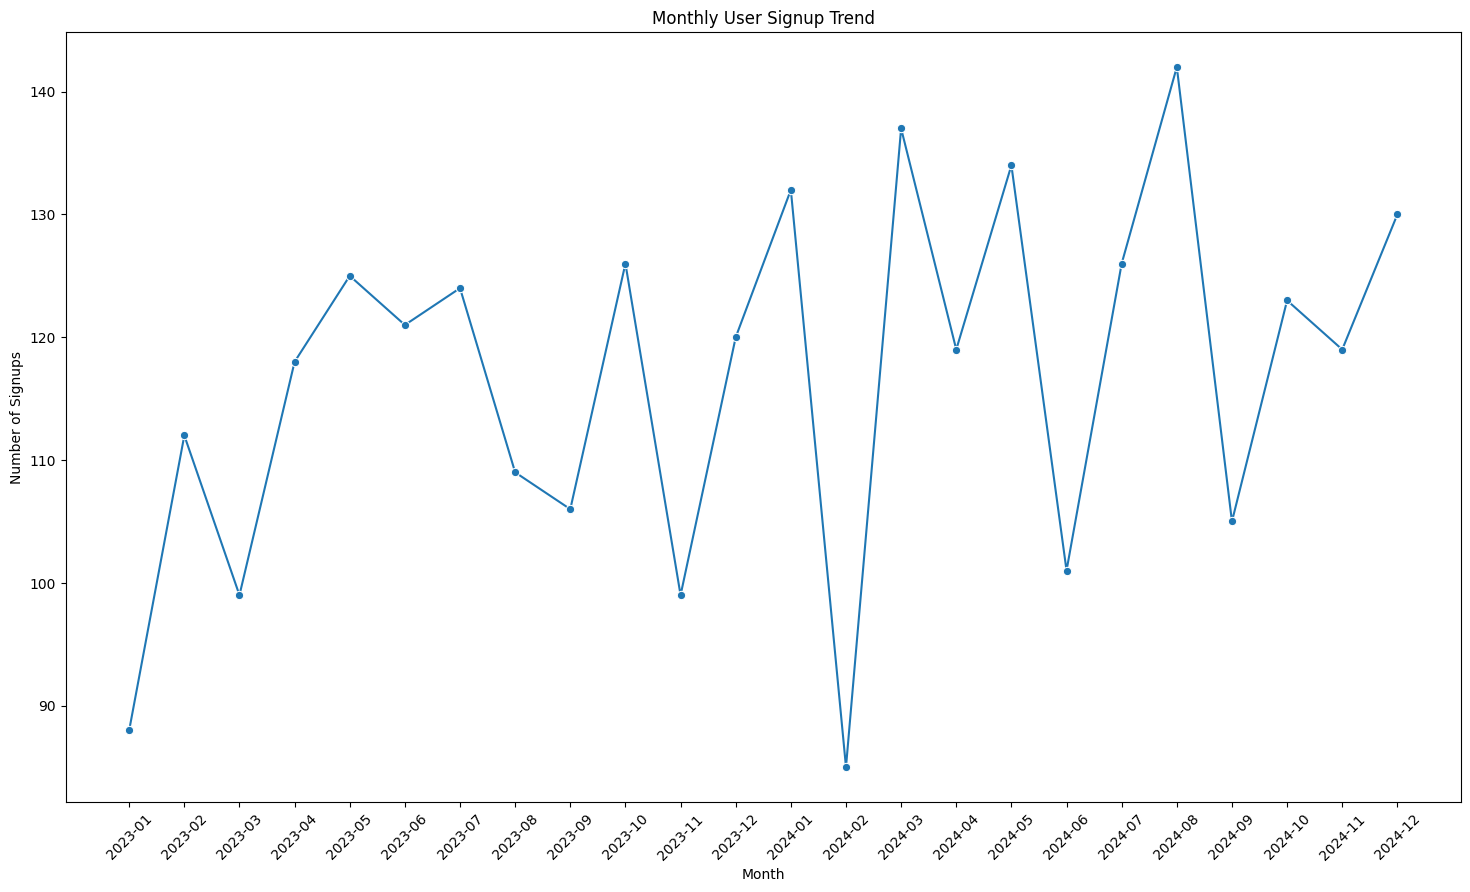

In [40]:

# Convert signup_date to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])

# Calculate monthly signups
monthly_signups = (
    df.groupby(df['signup_date'].dt.to_period('M'))
      .size()
      .reset_index(name='signups')
)

# Convert Period to string for plotting
monthly_signups['signup_date'] = monthly_signups['signup_date'].astype(str)

# Plot line chart using seaborn
plt.figure(figsize=(18, 10))
sns.lineplot(
    data=monthly_signups,
    x='signup_date',
    y='signups',
    marker='o'
)

plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.title('Monthly User Signup Trend')
plt.xticks(rotation=45)
plt.show()



Insight

The line chart reveals fluctuations in monthly signups, highlighting periods of growth and decline. Such trends can be linked to marketing campaigns, seasonal effects, or product changes, helping businesses plan future strategies.

4️⃣ 📊 User Engagement Distribution
Goal

To understand how actively users engage with the platform by grouping their weekly usage levels.

Visualization

Bar chart of grouped avg_weekly_usage_hours.


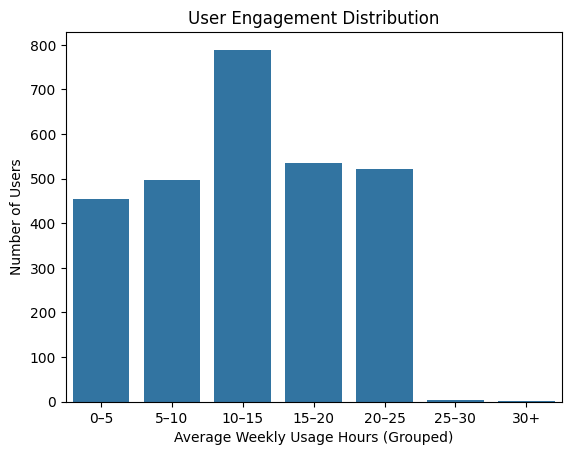

In [41]:

# Define usage bins
bins = [0, 5, 10, 15, 20, 25, 30, 40]
labels = ['0–5', '5–10', '10–15', '15–20', '20–25', '25–30', '30+']

# Create usage groups
df['usage_group'] = pd.cut(
    df['avg_weekly_usage_hours'],
    bins=bins,
    labels=labels,
    right=False
)

# Count users in each group
usage_counts = df['usage_group'].value_counts().sort_index().reset_index()
usage_counts.columns = ['usage_group', 'user_count']

# Plot bar chart using seaborn
plt.figure()
sns.barplot(
    data=usage_counts,
    x='usage_group',
    y='user_count'
)

plt.xlabel('Average Weekly Usage Hours (Grouped)')
plt.ylabel('Number of Users')
plt.title('User Engagement Distribution')
plt.show()



Insight

The bar chart shows that most users fall within the moderate usage range (10–20 hours per week), while fewer users are either very low or very high in engagement. This grouping makes it easier to identify engagement tiers for targeted actions such as retention or feature promotion.

5️⃣ 🔥 Engagement-Related Feature Correlation
Goal

To analyze the relationships between key engagement-related numerical features.

Visualization

Annotated heatmap showing correlations among selected engagement features:

avg_weekly_usage_hours

support_tickets

payment_failures

tenure_months

last_login_days_ago


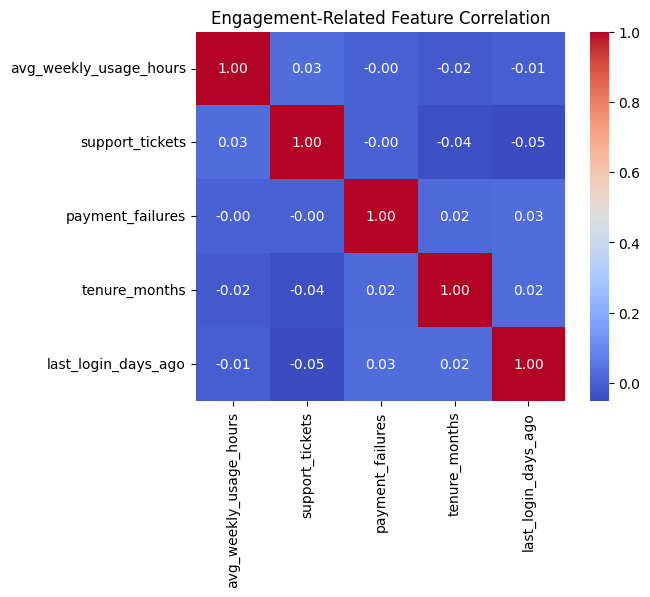

In [42]:


features = [
    'avg_weekly_usage_hours',
    'support_tickets',
    'payment_failures',
    'tenure_months',
    'last_login_days_ago'
]

# Correlation matrix
corr = df[features].corr()

# Plot heatmap
plt.figure()
sns.heatmap(
    corr,
    annot=True,          # show values
    fmt=".2f",           # 2 decimal places
    cmap="coolwarm",     # color scheme
    square=True,
    cbar=True
)

plt.title('Engagement-Related Feature Correlation')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



Insight

The heatmap reveals how user engagement, tenure, support activity, and payment issues relate to one another. Most correlations are weak, suggesting that these features capture different aspects of user behavior, which is useful for analysis and modeling


# 📝 Final Insights

**Subscription Distribution:** Users are almost evenly distributed across Basic, Standard, and Premium plans, indicating balanced adoption of pricing tiers.

**Revenue Analysis:** Premium subscriptions generate the highest revenue, highlighting their importance for business growth despite similar user counts.

**User Growth Trend:** Monthly signups show fluctuations with an overall stable growth pattern, suggesting consistent user acquisition with seasonal variations.

**User Engagement:** Most users fall within the 10–20 hours/week usage range, indicating moderate engagement, while very high or very low usage users are fewer.

**Engagement Correlation:** Engagement-related features show weak correlations, meaning each feature captures a different aspect of user behavior and adds independent value to analysis.

# Conclusion

This exploratory data analysis provides a clear understanding of user behavior, revenue contribution, growth trends, and engagement patterns. The insights highlight the importance of Premium users for revenue, moderate engagement as the norm, and feature independence, making the dataset suitable for further analysis such as churn prediction, user segmentation, and retention modeling.

